In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

In [2]:
ND = np.load("nodelay.npz")['BigImgNDCpsd']
D = np.load("delay.npz")['BigImgCpsd']

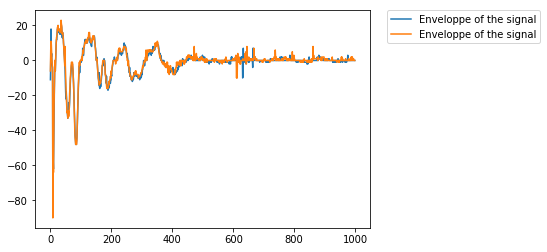

In [124]:
plt.plot( D[0][0:1000]-256, label='Enveloppe of the signal')
plt.plot( D[1][0:1000]-256, label='Enveloppe of the signal') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

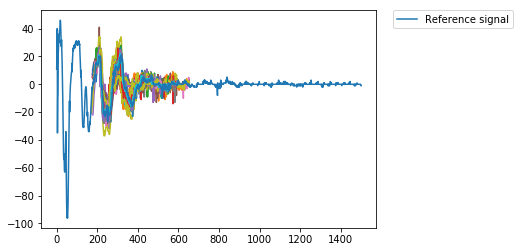

253


In [158]:
OffSets = []
DD = []
for l in range(60):
    Ref = ND[0][0:1500]-256
    Test = ND[l][200:600]-256
    Corr = signal.correlate(Ref/1.0, Test/1.0, mode='same') 
    ACorr = np.argmax(Corr) #
    zero_array = np.zeros([ACorr])
    line = np.hstack([zero_array,ND[l]])[0:10000]
    DD.append(line)
    OffSets.append((ACorr))
    plt.plot( ACorr+range(len(Test)) , Test) 
OffMax = max(OffSets) 
#plt.plot( OffSets, label='Enveloppe of the signal') 
plt.plot( Ref, label='Reference signal') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print OffMax
DD = np.asarray(DD)

In [160]:
DD[l]

array([   0.,    0.,    0., ...,  256.,  256.,  256.])

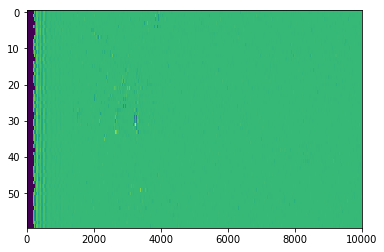

In [161]:
m = 0
plt.imshow( DD,aspect="auto")
plt.show()

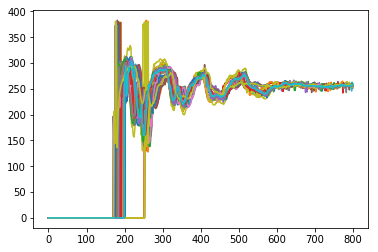

In [156]:
for i in range(60):
    plt.plot(DD[i][0:800]) 
plt.show()

In [162]:
H = []
SH = []
Reconstructed = []
FFTMap = []
SFFTMap = []
Dec = []
for ml in range(60): 
    SigTest = DD[ml,0:10000]
    FFT = np.fft.fft(SigTest)
    FStart = 1200
    FStop = 2700
    Ssig = []
    for p in range(10000/2):
        Ssig.append(SigTest[2*p]+SigTest[2*p+1])
    SFFT = np.fft.fft(Ssig)   
    for k in range(len(FFT)/2):
        if (k < FStart or k > FStop): # in (k < 550000 or k > 790000) # 0.068 0.196
            FFT[k] = 0
            FFT[-k] = 0
    tmp = np.fft.fft(SigTest)
    for k in range(50):
        tmp[k] = 0
        tmp[-k] = 0
        SFFT[-k] = 0
        SFFT[k] = 0
    Dec.append(Ssig)
    Filtered = np.real(np.fft.ifft(FFT))
    SFFTMap.append( np.abs(SFFT) )
    FFTMap.append( np.abs(tmp) )
    Reconstructed.append( Filtered[0:6000] )
    H.append ( np.abs(signal.hilbert(Filtered))[0:6000] )
    SH.append ( np.abs(signal.hilbert(np.real(np.fft.ifft(SFFT))))[0:6000/2] )

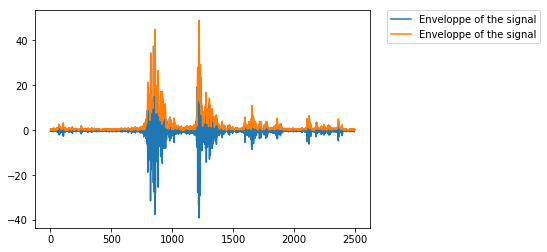

In [170]:
plt.plot(Reconstructed[20][2000:4500], label='Enveloppe of the signal') 
plt.plot(H[20][2000:4500], label='Enveloppe of the signal') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

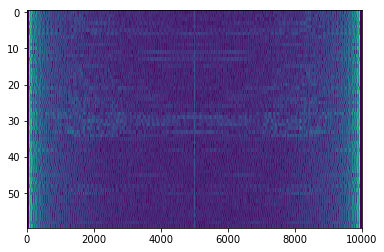

In [167]:
plt.imshow(np.sqrt(FFTMap),aspect="auto")
#plt.savefig("D_image.jpg", bbox_inches='tight')
plt.show()

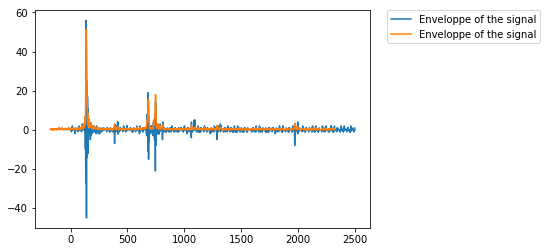

In [179]:
LineNb = 35
plt.plot(range(2500),ND[LineNb,2000:4500]-256, label='Enveloppe of the signal')
plt.plot(range(2500)-OffSets[LineNb],H[LineNb][2000:4500], label='Enveloppe of the signal') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [66]:
np.shape(Reconstructed)

(60, 6000)

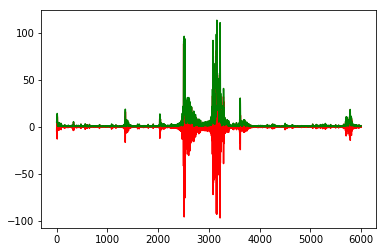

In [67]:
plt.plot(Reconstructed[30][0:6000],"r")
plt.plot(H[30][0:6000],"g")
plt.show()

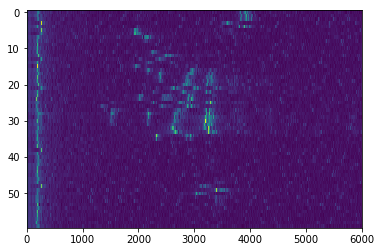

In [166]:
plt.imshow(np.sqrt(H),aspect="auto")
plt.savefig("D_image.jpg", bbox_inches='tight')
plt.show()